In [1]:
# supress any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# python imports
from collections import defaultdict

# third-party imports
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
prompt_injection_train = pd.read_csv('data/prompt_injection_train.csv')
prompt_injection_test = pd.read_csv('data/prompt_injection_test.csv')

In [4]:
X_train = prompt_injection_train['prompt']
y_train = prompt_injection_train['label']

X_test = prompt_injection_test['prompt']
y_test = prompt_injection_test['label']

## Creating vectors

In [5]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), lowercase=True, stop_words='english')

X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

## Train a classification model

In [6]:
model_names = ['LogisticRegression', 'RandomForest', 'GradientBoosting', 'SVC', 'MLP']
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC(), MLPClassifier()]

results = dict()

for model, model_name in zip(models, model_names):        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.setdefault(model_name, {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'cm': confusion_matrix(y_test, y_pred, labels=[0, 1], normalize='true')
    })

In [7]:
data = pd.DataFrame({
    'model': model_names,
    'accuracy': [results[model_name]['accuracy'] for model_name in model_names],
    'precision': [results[model_name]['precision'] for model_name in model_names],
    'recall': [results[model_name]['recall'] for model_name in model_names],
    'f1_score': [results[model_name]['f1_score'] for model_name in model_names],
})

In [8]:
data

,model,accuracy,precision,recall,f1_score
0,LogisticRegression,0.996044,0.942356,0.624585,0.751249
1,RandomForest,0.999730,0.977162,0.995017,0.986008
2,GradientBoosting,0.997363,0.937751,0.775748,0.849091
3,SVC,0.998681,0.960924,0.898671,0.928755
4,MLP,0.999635,0.994872,0.966777,0.980623


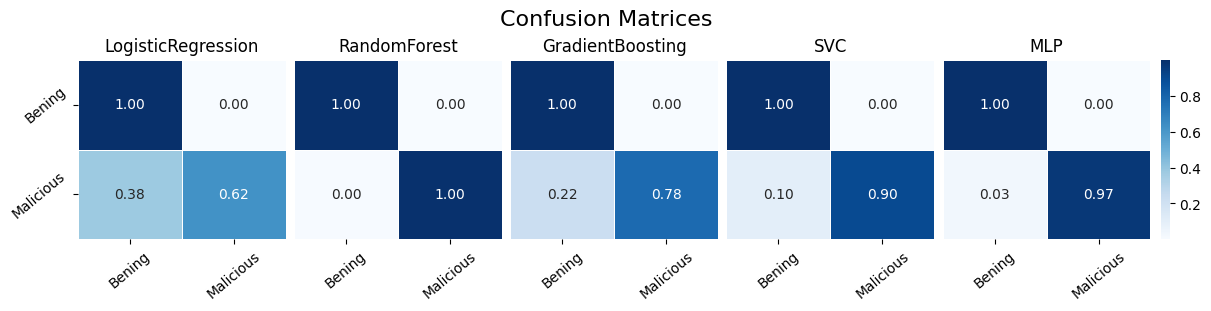

In [9]:
labels = ['Bening', 'Malicious']
titles = results.keys()
cms = [results[model_name]['cm'] for model_name in model_names]

fig, axes = plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)

fig.suptitle(f'Confusion Matrices', size=16)

for index, (axe, cm, title) in enumerate(zip(axes, cms, titles)):
    
    yticks = labels if index == 0 else False
    draw_cbar = True if index == 4 else False
    
    axe.set_title(title)
    axe = sns.heatmap(cm, ax=axe, annot=True, fmt=".2f", linewidths=.5, cmap=plt.cm.Blues, 
                      yticklabels=yticks, xticklabels=labels, cbar=draw_cbar)
    
    axe.set_xticklabels(axe.get_xticklabels(), rotation=40)
    axe.set_yticklabels(axe.get_yticklabels(), rotation=40)
    
plt.show()